# Linear Regression Model

In [1]:
#importing Modules
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns

In [2]:
#Loading data and taking respective columns form each data set
df1 = pd.read_csv('data.csv')
df2 = pd.read_csv('hist_india_vix_11-Feb-2021_10-Feb-2022.csv')
df3 = pd.read_csv('NIFTY50all11-02-2021-TO-10-02-2022.csv')
a = df1['High']
b = df2['Prev. Close ']
data = pd.concat([a,b,df3],axis=1)
data.head()

,High,Prev. Close,Date,P/E,P/B,Div Yield
0,15188.50,23.9525,11-Feb-2021,41.65,4.30,1.05
1,15243.50,23.9525,12-Feb-2021,41.58,4.30,1.05
2,15340.15,22.0425,15-Feb-2021,41.59,4.34,1.04
3,15431.75,21.4750,16-Feb-2021,41.78,4.34,1.04
4,15314.30,21.7800,17-Feb-2021,41.49,4.31,1.04


In [3]:
data=data.drop('Date',axis=1)
#Change columns names
data.columns=['Nifty-50_price', 'Vix', 'P/E', 'P/B', 'Div Yield']
print(data.columns)
print(data.corr())

Index(['Nifty-50_price', 'Vix', 'P/E', 'P/B', 'Div Yield'], dtype='object')
                Nifty-50_price       Vix       P/E       P/B  Div Yield
Nifty-50_price        1.000000 -0.408132 -0.725195  0.768902   0.548903
Vix                  -0.408132  1.000000  0.589743 -0.211485  -0.428235
P/E                  -0.725195  0.589743  1.000000 -0.413688  -0.531976
P/B                   0.768902 -0.211485 -0.413688  1.000000   0.243274
Div Yield             0.548903 -0.428235 -0.531976  0.243274   1.000000


# Visualising Data

<AxesSubplot:xlabel='Div Yield', ylabel='Nifty-50_price'>

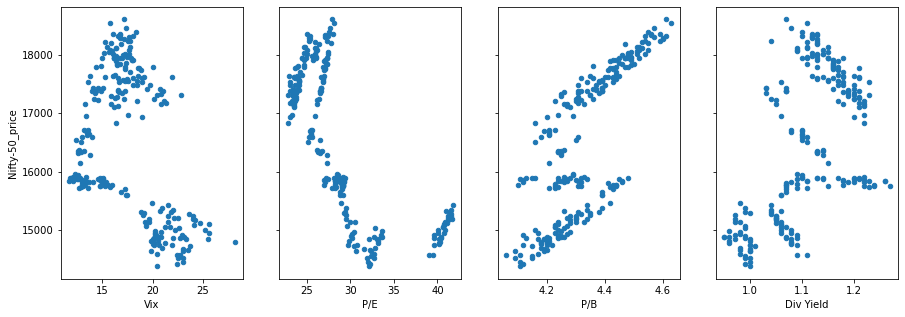

In [4]:
import matplotlib.pyplot as plt
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
data.plot(kind='scatter', x='Vix', y='Nifty-50_price', ax=axs[0], figsize=(15,5))
data.plot(kind='scatter', x='P/E', y='Nifty-50_price', ax=axs[1])
data.plot(kind='scatter', x='P/B', y='Nifty-50_price', ax=axs[2])
data.plot(kind='scatter', x='Div Yield', y='Nifty-50_price', ax=axs[3])

In [5]:
#Splitting of data into train and test
from sklearn.model_selection import train_test_split
X= data.drop(['Nifty-50_price'], axis=1)
y=data['Nifty-50_price']
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 5) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(198, 4) (198,)
(50, 4) (50,)


# Scaled Data

In [6]:
#Scalling of Data

from sklearn.preprocessing import StandardScaler
# set up the scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Building a model of LinearRegression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
y_pred = lm.predict(X_test_scaled)
# print(y_pred.size)
print("Scaled data score LR : ",lm.score(X_train_scaled,y_train))

# # print intercept and coefficients
print("Intercept : ",lm.intercept_)
print("Coefficient : ",lm.coef_)

#R2 score and RSME 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 score",r2_score(y_test, y_pred))
print("RMSE",mean_squared_error(y_test, y_pred))

Scaled data score LR :  0.8040527100383117
Intercept :  16496.87196969697
Coefficient :  [  54.69081446 -525.88498491  638.12546864  269.63965995]
R2 score 0.8836690329750496
RMSE 208454.95163288456


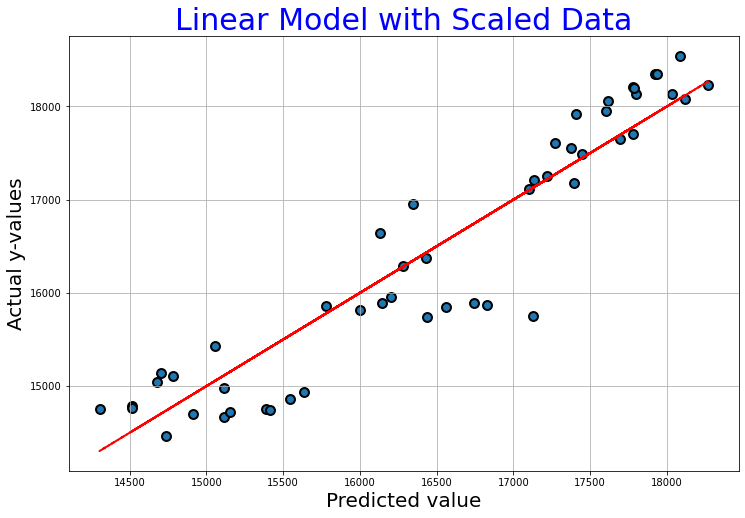

In [7]:
plt.figure(figsize=(12,8))
plt.title("Linear Model with Scaled Data",fontdict={'fontsize': 30, 'color':'b'})
plt.xlabel("Predicted value",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred,y_test,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred,y_pred, 'r--', lw=2)


# Unscaled Data

In [8]:
#Unscaled Data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_u = lm.predict(X_test)
# print(y_pred_u)
print("Model Score Unscaled data : ",lm.score(X_train,y_train))
print("Intercept : ",lm.intercept_)
print("Coefficient : ",lm.coef_)

#R2 and RSME
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 score : ",r2_score(y_test, y_pred_u))
print("RMSE : ",mean_squared_error(y_test, y_pred_u))

Model Score Unscaled data :  0.8040527100383116
Intercept :  -7036.139918296714
Coefficient :  [  15.67874491 -101.32536026 5141.85156911 3529.64640991]
R2 score :  0.8836690329750497
RMSE :  208454.95163288442


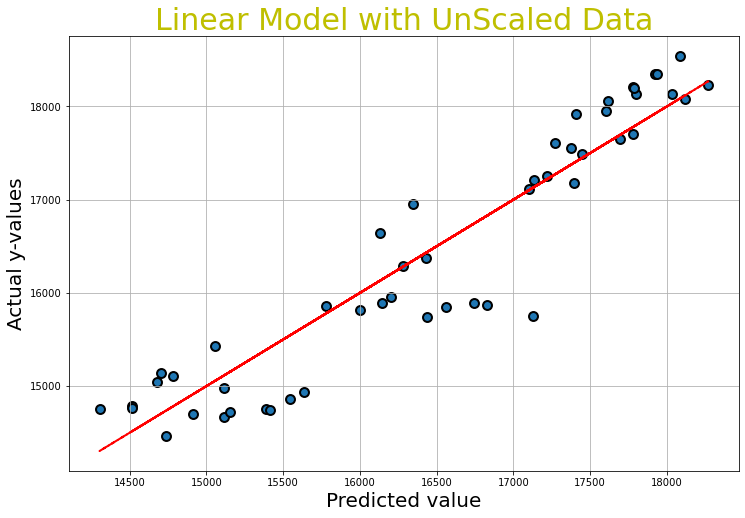

In [9]:
plt.figure(figsize=(12,8))
plt.title("Linear Model with UnScaled Data",fontdict={'fontsize': 30, 'color':'y'})
plt.xlabel("Predicted value",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred,y_test,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred,y_pred, 'r--', lw=2)

# Lasso Model 


In [10]:
from sklearn.linear_model import LassoCV

model1 = LassoCV(cv=50,verbose=0,normalize=True,eps=0.01,n_alphas=200, tol=0.001,max_iter=3000)
model1.fit(X_train,y_train)
y_pred1 = np.array(model1.predict(X_train))
RMSE_1=np.sqrt(np.sum(np.square(y_pred1-y_train)))
print("Root-mean-square error:",RMSE_1)
print("Lasso Model Score : ",model1.score(X_train,y_train))
print("Alpha Value : ",model1.alpha_)

Root-mean-square error: 7589.052038140346
Lasso Model Score :  0.8037371057483405
Alpha Value :  0.6357815799859349


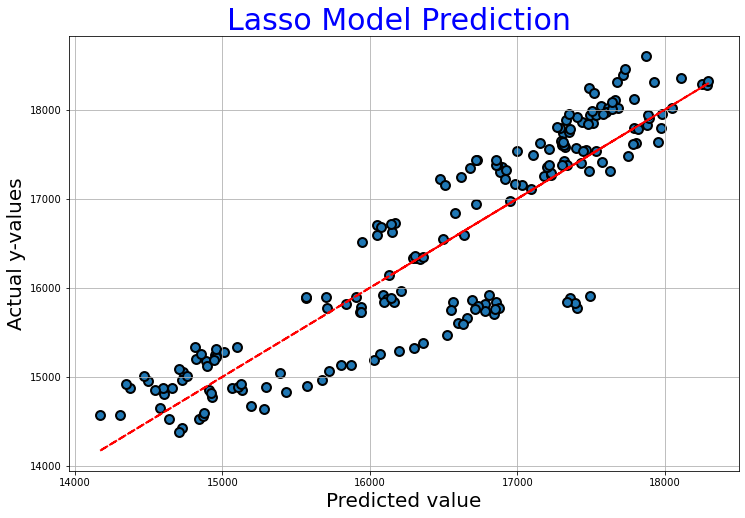

In [11]:
plt.figure(figsize=(12,8))
plt.title("Lasso Model Prediction ",fontdict={'fontsize': 30, 'color':'b'})
plt.xlabel("Predicted value",fontsize=20)
plt.ylabel("Actual y-values",fontsize=20)
plt.grid(1)
plt.scatter(y_pred1,y_train,edgecolors=(0,0,0),lw=2,s=80)
plt.plot(y_pred1,y_pred1, 'r--', lw=2)

# Ridge

In [12]:
from sklearn import linear_model

Re = linear_model.Ridge(alpha=50, max_iter=100,tol=0.1)
Re.fit(X_train,y_train)
print("Ridge Model Score : ",Re.score(X_train,y_train))

Ridge Model Score :  0.5594850104158703
